# Humor Detection in Text - EDA and Prediction

## Import our Module

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.__version__

'1.2.5'

In [2]:
# read our dataframe
df_humor = pd.read_csv('humor_data.csv')
df_humor

text  humor
0       Joe biden rules out 2020 bid: 'guys, i'm not r...  False
1       Watch: darvish gave hitter whiplash with slow ...  False
2       What do you call a turtle without its shell? d...   True
3           5 reasons the 2016 election feels so personal  False
4       Pasco police shot mexican migrant from behind,...  False
...                                                   ...    ...
199995  Conor maynard seamlessly fits old-school r&b h...  False
199996  How to you make holy water? you boil the hell ...   True
199997  How many optometrists does it take to screw in...   True
199998  Mcdonald's will officially kick off all-day br...  False
199999  An irish man walks on the street and ignores a...   True

[200000 rows x 2 columns]

In [3]:
# verify if this has null values
df_humor.isnull().sum()

text     0
humor    0
dtype: int64

In [4]:
df_humor.head()

text  humor
0  Joe biden rules out 2020 bid: 'guys, i'm not r...  False
1  Watch: darvish gave hitter whiplash with slow ...  False
2  What do you call a turtle without its shell? d...   True
3      5 reasons the 2016 election feels so personal  False
4  Pasco police shot mexican migrant from behind,...  False

In [5]:
df_humor.tail()

text  humor
199995  Conor maynard seamlessly fits old-school r&b h...  False
199996  How to you make holy water? you boil the hell ...   True
199997  How many optometrists does it take to screw in...   True
199998  Mcdonald's will officially kick off all-day br...  False
199999  An irish man walks on the street and ignores a...   True

In [6]:
df_humor.shape

(200000, 2)

In [7]:
df_humor.columns

Index(['text', 'humor'], dtype='object')

In [8]:
df_humor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    200000 non-null  object
 1   humor   200000 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 1.7+ MB


In [9]:
df_humor['humor'].value_counts()

False    100000
True     100000
Name: humor, dtype: int64

In [10]:
data1 = df_humor['humor'].value_counts()
data1

False    100000
True     100000
Name: humor, dtype: int64

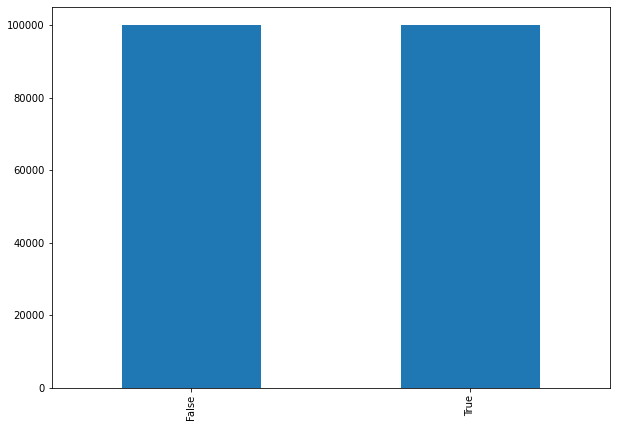

In [12]:
plt.figure(figsize=(10,7))
data1.plot(kind = 'bar')
plt.show()

In [13]:
# get the humor data
df_humor_data = df_humor[df_humor['humor'] == True]
df_humor_data

text  humor
2       What do you call a turtle without its shell? d...   True
6       What is a pokemon master's favorite kind of pa...   True
7       Why do native americans hate it when it rains ...   True
9           My family tree is a cactus, we're all pricks.   True
13      How are music and candy similar? we throw away...   True
...                                                   ...    ...
199990   Where do eskimos keep their money? in snowbanks.   True
199993  What did the child with no arms get for christ...   True
199996  How to you make holy water? you boil the hell ...   True
199997  How many optometrists does it take to screw in...   True
199999  An irish man walks on the street and ignores a...   True

[100000 rows x 2 columns]

In [15]:
!pip install wordcloud==1.8.1

     |████████████████████████████████| 366 kB 29.0 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [17]:
# create the wordcloud
from wordcloud import WordCloud, STOPWORDS
texts = ' '.join(df_humor_data['text'])
texts

"What do you call a turtle without its shell? dead. What is a pokemon master's favorite kind of pasta? wartortellini! Why do native americans hate it when it rains in april? because it brings mayflowers. My family tree is a cactus, we're all pricks. How are music and candy similar? we throw away the rappers. I just ended a 5 year relationship i'm fine, it wasn't my relationship :p Dating tip: surprise your date! show up a day early. What do you call an explanation of an asian cooking show? a wok-through. Why did little miss muffet have gps on her tuffet? to keep her from losing her whey. All pants are breakaway pants if you're angry enough Ugh, i just spilled red wine all over the inside of my tummy. Why do jews have big noses? because the air is free Interesting fact: by the year 2020 all actors on american tv shows will be australian. I'd tell you a chemistry joke but i know i won't get a reaction Did you know diarrhea is genetic? it runs in your jeans My sons ebola joke what do afri

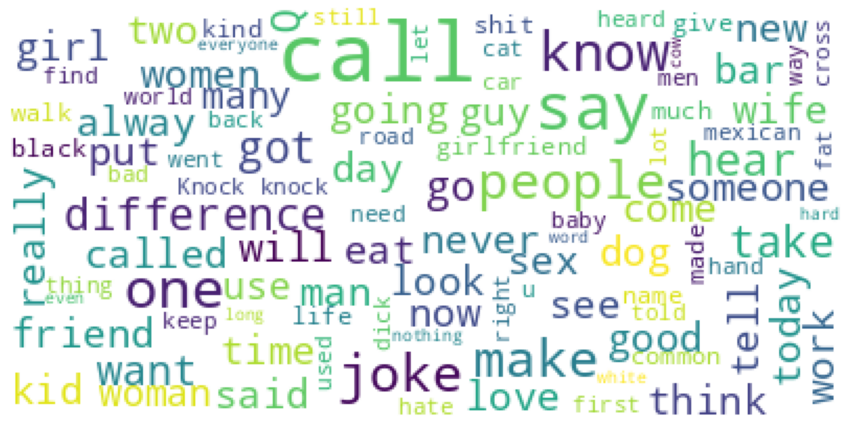

In [21]:
stopwords = STOPWORDS

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=100,
    max_font_size=40,
    random_state=42
).generate(texts)

plt.figure(figsize=(15,12), facecolor=None)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [24]:
df_non_humor_data = df_humor[df_humor['humor'] == False]
df_non_humor_data

text  humor
0       Joe biden rules out 2020 bid: 'guys, i'm not r...  False
1       Watch: darvish gave hitter whiplash with slow ...  False
3           5 reasons the 2016 election feels so personal  False
4       Pasco police shot mexican migrant from behind,...  False
5       Martha stewart tweets hideous food photo, twit...  False
...                                                   ...    ...
199991  Meet the billionaire who controls your ketchup...  False
199992  North korea stages large-scale artillery drill...  False
199994  Elizabeth taylor looked amazing even without d...  False
199995  Conor maynard seamlessly fits old-school r&b h...  False
199998  Mcdonald's will officially kick off all-day br...  False

[100000 rows x 2 columns]

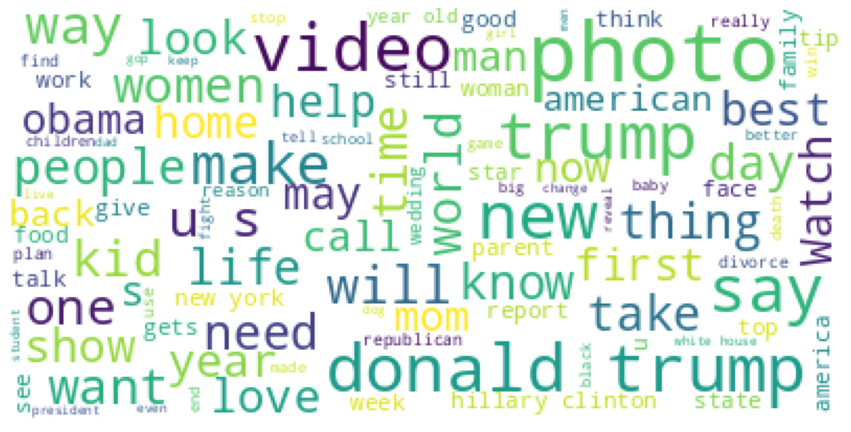

In [25]:
texts = ' '.join(df_non_humor_data['text'])
stopwords = STOPWORDS

wordcloud = WordCloud(
    stopwords=stopwords,
    max_words=100,
    max_font_size=40,
    background_color='white',
    random_state=42
).generate(texts)

plt.figure(figsize=(15,12), facecolor=None)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [32]:
df_humor['question'] = df_humor['text'].str.contains('\?')
df_humor

text  humor  question
0       Joe biden rules out 2020 bid: 'guys, i'm not r...  False     False
1       Watch: darvish gave hitter whiplash with slow ...  False     False
2       What do you call a turtle without its shell? d...   True      True
3           5 reasons the 2016 election feels so personal  False     False
4       Pasco police shot mexican migrant from behind,...  False     False
...                                                   ...    ...       ...
199995  Conor maynard seamlessly fits old-school r&b h...  False     False
199996  How to you make holy water? you boil the hell ...   True      True
199997  How many optometrists does it take to screw in...   True      True
199998  Mcdonald's will officially kick off all-day br...  False     False
199999  An irish man walks on the street and ignores a...   True     False

[200000 rows x 3 columns]

<AxesSubplot:xlabel='humor,question'>

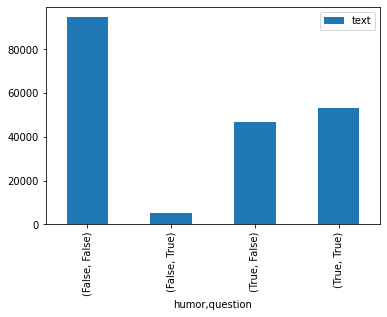

In [41]:
df_humor.groupby(['humor', 'question']).count().plot(kind = 'bar')

In [42]:
import re
import string
import nltk
from nltk.util import pr
from nltk.corpus import stopwords
stemmer = nltk.SnowballStemmer("english")
nltk.download('stopwords')
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [43]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [44]:
df_humor["text"] = df_humor["text"].apply(clean)

In [45]:
df_humor

text  humor  question
0                          joe biden rule  bid guy im run  False     False
1           watch darvish gave hitter whiplash slow pitch  False     False
2                           call turtl without shell dead   True      True
3                               reason  elect feel person  False     False
4       pasco polic shot mexican migrant behind new au...  False     False
...                                                   ...    ...       ...
199995  conor maynard seamless fit oldschool rb hit dr...  False     False
199996                          make holi water boil hell   True      True
199997  mani optometrist take screw lightbulb one two ...   True      True
199998       mcdonald offici kick allday breakfast octob   False     False
199999  irish man walk street ignor bar muahahaha like...   True     False

[200000 rows x 3 columns]

# Decision Tree Classifier

### Import the module

In [49]:
from sklearn.tree import DecisionTreeClassifier

### Separate in 'x' and 'y' axis

In [59]:
x = np.array(df_humor['text'])
y = np.array(df_humor['humor'])

### Import CountVectorizer and train_test_split

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [60]:
cv = CountVectorizer()
x = cv.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=4)

> Create an object DecisionTreeClasifier and fit our model using the training data

In [51]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

> We can test our model

In [52]:
text1 = "I like sleeping. I just dont like going to sleep."
data = cv.transform([text1]).toarray()
print(clf.predict(data))

[ True]


In [53]:
text2 = "I wonder if the earth, teases other planets, for having no life."
data = cv.transform([text2]).toarray()
print(clf.predict(data))

[False]


In [54]:
text3 = "In the morning, there is a huge difference between 6:00 and 6:10."
data = cv.transform([text3]).toarray()
print(clf.predict(data))

[ True]


### Training and test Accuracy

In [56]:
print(f'Training Accuracy: {clf.score(x_train, y_train)}')
print(f'Testing Accuracy: {clf.score(x_test, y_test)}')

Training Accuracy: 0.9999925373134328
Testing Accuracy: 0.8248787878787879


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6ec106f5-66e1-44f0-b8ff-98e947d31b45' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>